# Data Analysis on Crypto Currency Market

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('coinmarketcap_06122017.csv')
print(df.head())

   Unnamed: 0  24h_volume_usd  available_supply            id  last_updated   
0           0    9.007640e+09      1.672352e+07       bitcoin    1512549554  \
1           1    1.551330e+09      9.616537e+07      ethereum    1512549553   
2           2    1.111350e+09      1.684044e+07  bitcoin-cash    1512549578   
3           3    2.936090e+09      2.779530e+09          iota    1512549571   
4           4    2.315050e+08      3.873915e+10        ripple    1512549541   

   market_cap_usd    max_supply          name  percent_change_1h   
0    2.130493e+11  2.100000e+07       Bitcoin               0.12  \
1    4.352945e+10           NaN      Ethereum              -0.18   
2    2.529585e+10  2.100000e+07  Bitcoin Cash               1.65   
3    1.475225e+10  2.779530e+09          IOTA              -2.38   
4    9.365343e+09  1.000000e+11        Ripple               0.56   

   percent_change_24h  percent_change_7d  price_btc     price_usd  rank   
0                7.33              17.45 

In [46]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1326 entries, 0 to 1325
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1326 non-null   int64  
 1   24h_volume_usd      1270 non-null   float64
 2   available_supply    1031 non-null   float64
 3   id                  1326 non-null   object 
 4   last_updated        1326 non-null   int64  
 5   market_cap_usd      1031 non-null   float64
 6   max_supply          215 non-null    float64
 7   name                1326 non-null   object 
 8   percent_change_1h   1273 non-null   float64
 9   percent_change_24h  1270 non-null   float64
 10  percent_change_7d   1283 non-null   float64
 11  price_btc           1326 non-null   float64
 12  price_usd           1326 non-null   float64
 13  rank                1326 non-null   int64  
 14  symbol              1326 non-null   object 
 15  total_supply        1211 non-null   float64
dtypes: flo

We can observe that there are clearly a lot of issing values in certain coloumns.

In [47]:
df['name'].nunique()

1324

So, here we can see that almost the cryptos are unique except two crypto have repeated. 

In [48]:
df[df['market_cap_usd'].isna()]

,Unnamed: 0,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply
1031,1031,11172300.0,NaN,atmcoin,1512549575,NaN,NaN,ATMCoin,0.02,2.75,11.52,2.436400e-04,3.048440,1032,ATMC,1.000000e+10
1032,1032,9796350.0,NaN,cybermiles,1512549587,NaN,NaN,CyberMiles,-0.86,NaN,NaN,3.098000e-05,0.387677,1033,CMT,1.000000e+09
1033,1033,7810450.0,NaN,bitcoin-diamond,1512549587,NaN,2.100000e+08,Bitcoin Diamond [Futures],-0.29,-20.41,-30.47,3.000440e-03,37.542200,1034,BCD,NaN
1034,1034,6075160.0,NaN,electroneum,1512549586,NaN,2.100000e+10,Electroneum,5.49,-14.71,128.79,7.680000e-06,0.096113,1035,ETN,5.195262e+09
1035,1035,5180910.0,NaN,poly-ai,1512549586,NaN,NaN,POLY AI,-1.88,3.44,-2.97,1.357440e-03,16.984700,1036,AI,2.900000e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1321,1321,NaN,NaN,turbocoin,1512368664,NaN,NaN,TurboCoin,NaN,NaN,8.12,1.000000e-08,0.000114,1322,TURBO,NaN
1322,1322,NaN,NaN,birds,1512535772,NaN,NaN,Birds,NaN,10.62,-42.10,1.000000e-08,0.000122,1323,BIRDS,NaN
1323,1323,NaN,NaN,bitcoincashscrypt,1512548078,NaN,NaN,BitcoinCashScrypt,-0.37,-37.39,-27.69,5.000000e-07,0.006202,1324,BCCS,2.502380e+06
1324,1324,NaN,NaN,swisscoin,1512540278,NaN,NaN,Swisscoin,NaN,4.39,-22.84,1.000000e-08,0.000123,1325,SIC,1.020000e+10


There are almost 295 rows which are filled with NaN. From the overview of the data, it can be interpreted as this are thos cryptos which doesnt even have capitalisation.Hence we can drop these values and analize the left data.

In [58]:
market_cap = df[['id', 'market_cap_usd']]
market_cap = market_cap[ market_cap['market_cap_usd'] > 0 ] 
market_cap_new = market_cap[ market_cap['market_cap_usd'] > 0 ] 

So we have eliminated almost all the values of those cryptos which didnt even had market capitalisation because it doesnt gonna affect much in the analysis we are doing. Now that we got the data correct, time to do some Exploratory Data Analysis.

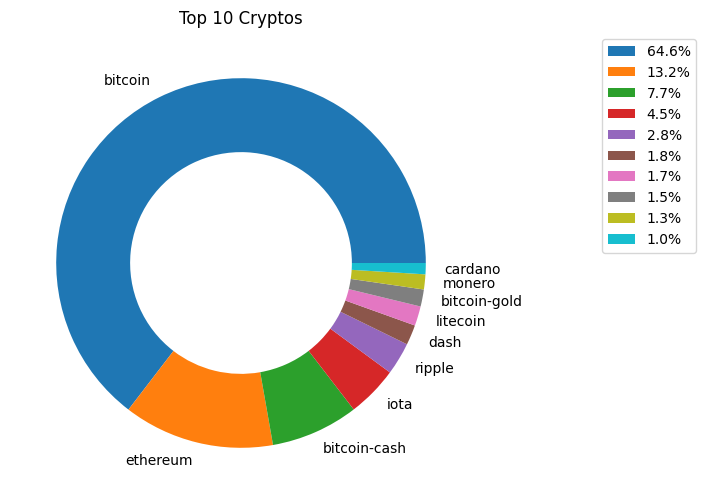

In [50]:

market_cap = market_cap.head(10)
market_cap['market_cap_per'] = (market_cap['market_cap_usd']/market_cap['market_cap_usd'].sum()) *100
fig, ax = plt.subplots(figsize=(10, 6))
wedges, texts, autotexts = ax.pie(market_cap['market_cap_per'], labels=market_cap['id'], wedgeprops=dict(width=0.4), autopct='')
ax.set_title("Top 10 Cryptos")

# Adding percentage labels outside the donut
percentage_labels = [f'{p:.1f}%' for p in market_cap['market_cap_per']]
ax.legend(wedges, percentage_labels, loc='upper right', bbox_to_anchor=(1, 0, 0.5, 1))


plt.show()

You have definitely heard about the danger in investing in cryptos right. Ok, Lets analyze from the given data that how volatile the Crypto field is?

For analyzing this, we can hover over the feature price change in 1 day and also price change in 1 week.

In [51]:
change = df[['id', 'percent_change_24h', 'percent_change_7d']].dropna().set_index('id')
change = change.sort_values('percent_change_24h')
change.head()

,percent_change_24h,percent_change_7d
id,,
flappycoin,-95.85,-96.61
credence-coin,-94.22,-95.31
coupecoin,-93.93,-61.24
tyrocoin,-79.02,-87.43
petrodollar,-76.55,542.96


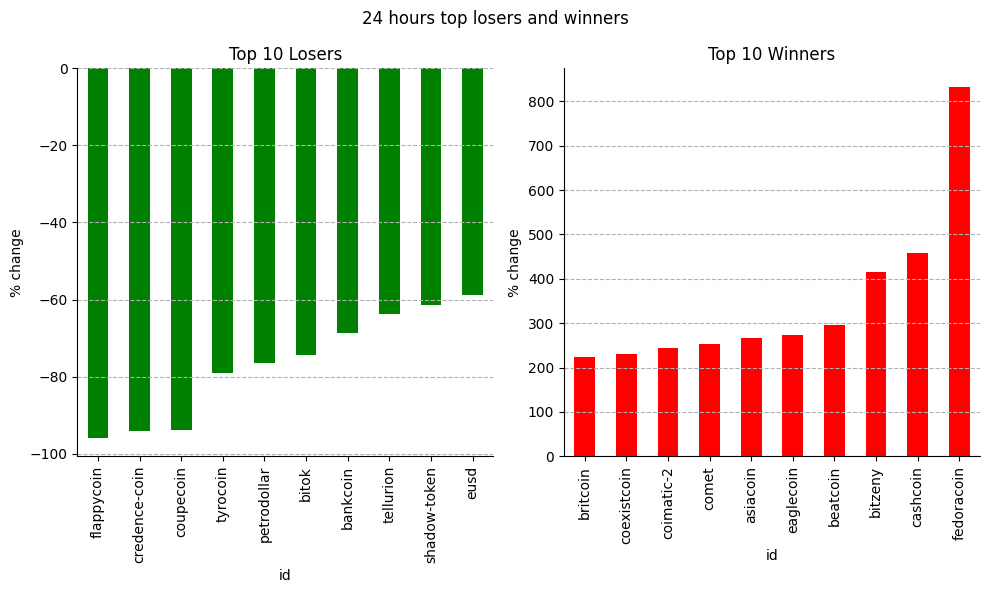

In [53]:
def top10_subplot(change_col, title, plot_type):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
    ax1 = axes[0]
    change_col[:10].plot(kind=plot_type, color='green', ax=ax1)
    ax1.set_ylabel('% change')
    ax1.set_title('Top 10 Losers')
    ax1.grid(axis='y', linestyle='--')
    ax2 = axes[1]
    change_col[-10:].plot(kind=plot_type, color='red', ax=ax2)
    ax2.set_ylabel('% change')
    ax2.set_title('Top 10 Winners')
    ax2.grid(axis='y', linestyle='--')
    fig.suptitle(title)
    for ax in axes:
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
    plt.tight_layout()
    return fig
Ttile_1 = "24 hours top losers and winners"
fig = top10_subplot(change.percent_change_24h, Ttile_1, 'bar')


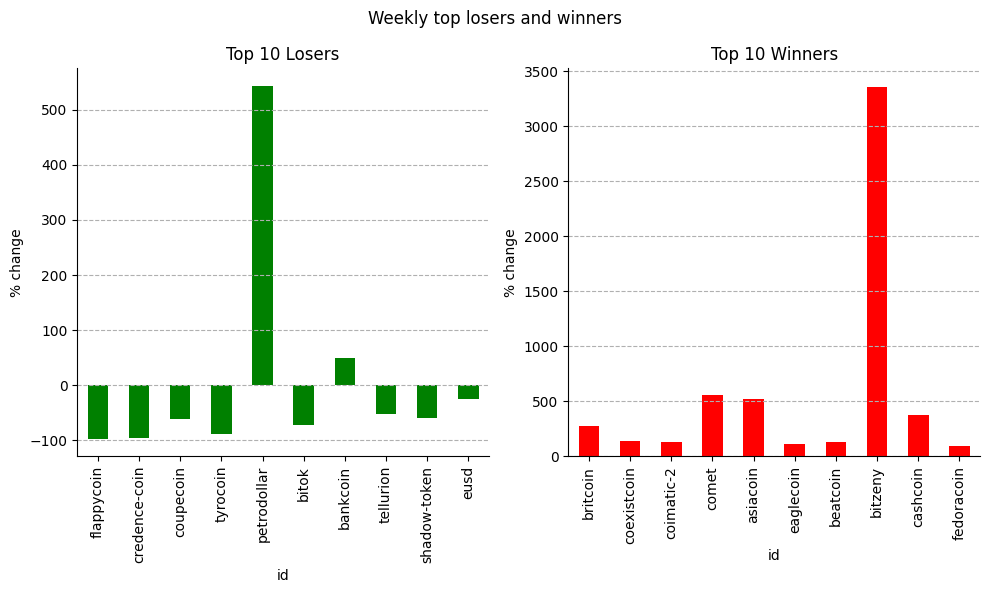

In [39]:
Title_2 = "Weekly top losers and winners"

# Calling the top10_subplot function
fig = top10_subplot(change.percent_change_7d, Title_2,'bar')

Since there are lot of cryptos upcoming and lot of them are already establsihed, we will just look which all cryptos are very bigger, then somewhat lies in the mid level and also in the bottom level.

<BarContainer object of 3 artists>

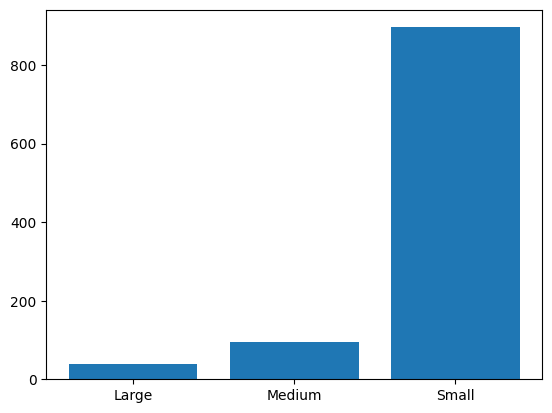

In [59]:

def count_market_caps(query_string):
    return market_cap_new.query(query_string).count().id

categories = ["Large", "Medium", "Small"]

large_caps = count_market_caps('market_cap_usd > 3E+8')
medium_caps = count_market_caps('market_cap_usd >= 5E+7 & market_cap_usd < 3E+8')
small_caps = count_market_caps('market_cap_usd < 5E+7')

values = [large_caps, medium_caps, small_caps]

plt.bar(range(len(values)), values, tick_label=categories)